<a href="https://colab.research.google.com/github/twishackaul/Sonar-Dataset-Classification/blob/main/Sonar_dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import numpy as np
import pandas as pd

In [146]:
import warnings
warnings.filterwarnings('ignore')

In [147]:
df = pd.read_csv('/content/sonar_dataset.csv', header = None)

In [148]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [149]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [150]:
X = df.drop(columns = [60])
y = df[60]

In [151]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [152]:
# R => 1 ; M => 0

y = pd.get_dummies(y, drop_first = True)
y = y.astype('int')
y

,R
0,1
1,1
2,1
3,1
4,1
...,...
203,0
204,0
205,0
206,0


In [153]:
X_train.shape

(156, 60)

In [154]:
X_test.shape

(52, 60)

In [155]:
y_train.shape

(156, 1)

In [156]:
print(y_test.shape)

(52, 1)


In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 1)

In [159]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
model = keras.Sequential([
    keras.layers.Dense(60, input_shape = (60,), activation = 'relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1, activation = 'sigmoid')
])

In [161]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [162]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), batch_size = 8)

Epoch 1/100
20/20 [==============================] - 2s 16ms/step - loss: 0.7647 - accuracy: 0.5000 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7258 - accuracy: 0.4872 - val_loss: 0.6870 - val_accuracy: 0.5192
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6990 - accuracy: 0.5577 - val_loss: 0.6838 - val_accuracy: 0.5192
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7459 - accuracy: 0.4103 - val_loss: 0.6848 - val_accuracy: 0.5192
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5577 - val_loss: 0.6808 - val_accuracy: 0.5192
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.7025 - accuracy: 0.5321 - val_loss: 0.6778 - val_accuracy: 0.5385
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.5449 - val_loss: 0.6772 - val_accuracy: 0.5192
Epoch 8/100


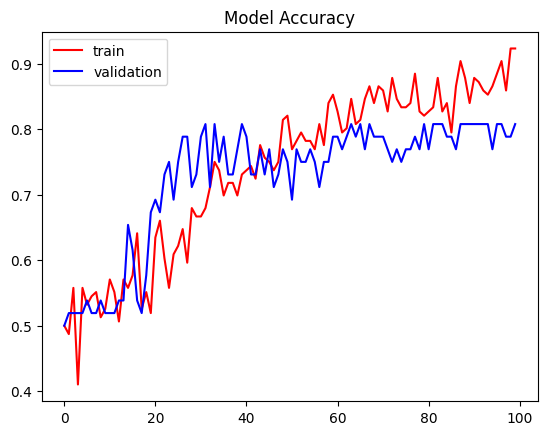

In [163]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.title('Model Accuracy')
plt.legend()
plt.show()

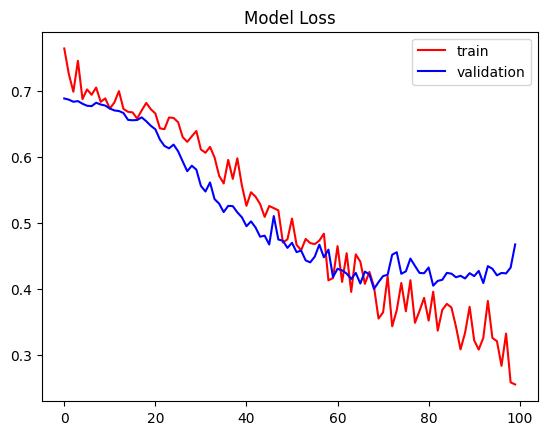

In [164]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.title('Model Loss')
plt.legend()
plt.show()

In [165]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [166]:
y_pred[0:5]

array([[0.00100635],
       [0.8937225 ],
       [0.9515426 ],
       [0.01855902],
       [0.9998739 ]], dtype=float32)

In [167]:
y_pred_new = [np.argmax(i) for i in y_pred]

In [168]:
y_pred_new[0:5]

[0, 0, 0, 0, 0]

In [169]:
y_test[0:5]

,R
186,0
155,0
165,0
200,0
58,1


In [170]:
CM = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_new)
CM

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[27,  0],
       [25,  0]], dtype=int32)>

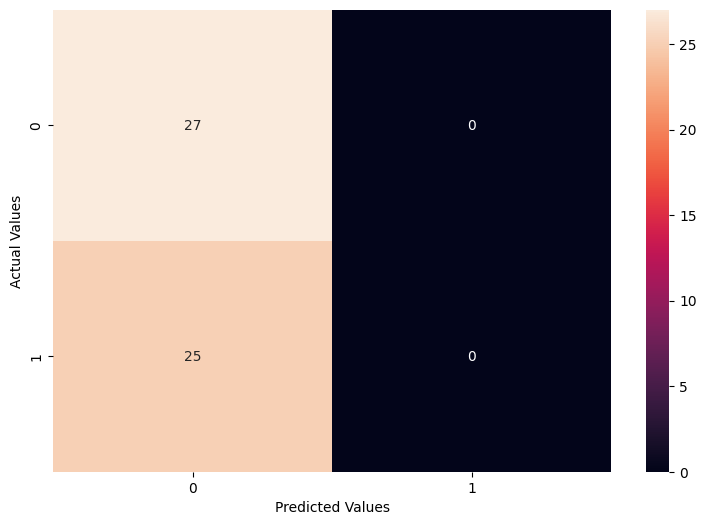

In [171]:
plt.figure(figsize = (9,6))
sns.heatmap(CM, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [172]:
model2 = keras.Sequential([

    keras.layers.Dense(60, input_shape = (60,), activation = 'relu'),

    keras.layers.Dense(30, activation = 'relu'),


    keras.layers.Dense(15, activation = 'relu'),

    keras.layers.Dense(1, activation = 'sigmoid')
])

In [173]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [174]:
history2 = model2.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), batch_size = 8)

Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 0.7016 - accuracy: 0.4295 - val_loss: 0.6877 - val_accuracy: 0.5769
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6825 - accuracy: 0.6090 - val_loss: 0.6807 - val_accuracy: 0.6538
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6704 - accuracy: 0.5897 - val_loss: 0.6664 - val_accuracy: 0.7308
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6538 - accuracy: 0.7500 - val_loss: 0.6492 - val_accuracy: 0.6923
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6309 - accuracy: 0.7051 - val_loss: 0.6322 - val_accuracy: 0.7115
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6115 - accuracy: 0.7372 - val_loss: 0.6138 - val_accuracy: 0.6538
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5679 - accuracy: 0.7756 - val_loss: 0.5708 - val_accuracy: 0.7115
Epoch 8/100


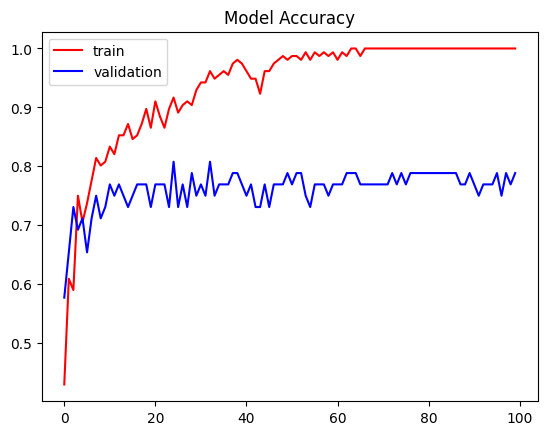

In [175]:
plt.plot(history2.history['accuracy'], color = 'red', label = 'train')
plt.plot(history2.history['val_accuracy'], color = 'blue', label = 'validation')
plt.title('Model Accuracy')
plt.legend()
plt.show()

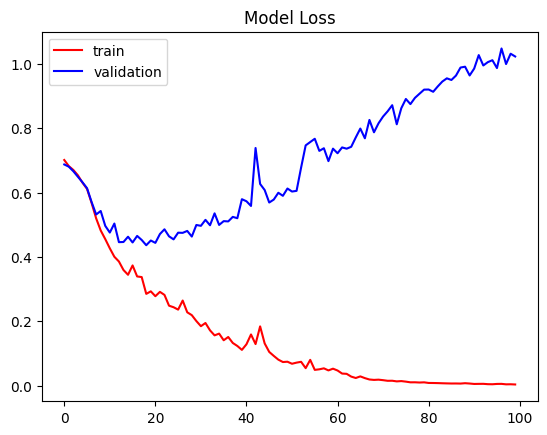

In [176]:
plt.plot(history2.history['loss'], color = 'red', label = 'train')
plt.plot(history2.history['val_loss'], color = 'blue', label = 'validation')
plt.title('Model Loss')
plt.legend()
plt.show()

In [177]:
y_pred2 = model2.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [178]:
y_pred2[0:5]

array([[1.0468975e-05],
       [9.9971557e-01],
       [9.9818790e-01],
       [2.0038133e-04],
       [1.0000000e+00]], dtype=float32)

In [179]:
y_pred2_new = [np.argmax(i) for i in y_pred2]

In [180]:
y_pred2_new[0:5]

[0, 0, 0, 0, 0]

In [181]:
y_test[0:5]

,R
186,0
155,0
165,0
200,0
58,1


In [182]:
CM = tf.math.confusion_matrix(labels = y_test, predictions = y_pred2_new)
CM

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[27,  0],
       [25,  0]], dtype=int32)>

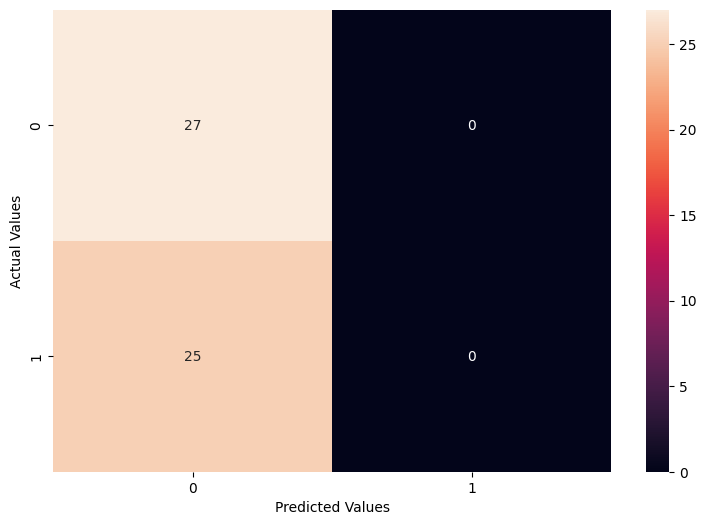

In [183]:
plt.figure(figsize = (9,6))
sns.heatmap(CM, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

##Comparing the 2 models

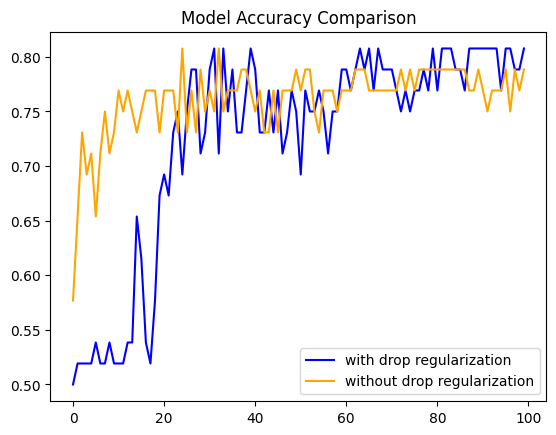

In [184]:
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'with drop regularization')
plt.plot(history2.history['val_accuracy'], color = 'orange', label = 'without drop regularization')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()

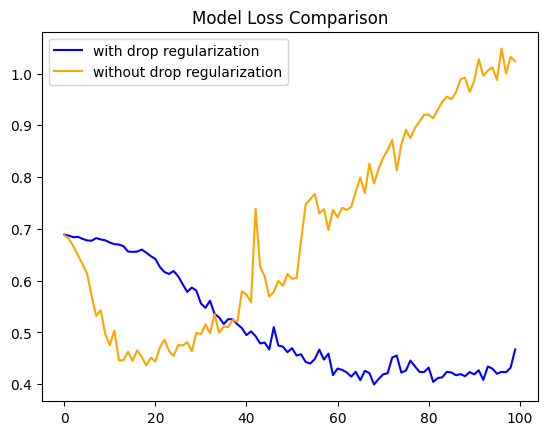

In [185]:
plt.plot(history.history['val_loss'], color = 'blue', label = 'with drop regularization')
plt.plot(history2.history['val_loss'], color = 'orange', label = 'without drop regularization')
plt.title('Model Loss Comparison')
plt.legend()
plt.show()